In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [2]:
data = pd.read_csv('eurusd.csv', parse_dates=['Date'], index_col='Date')
data

,price
Date,
2004-01-01,1.258194
2004-01-02,1.258194
2004-01-05,1.268698
2004-01-06,1.272103
2004-01-07,1.264095
...,...
2020-06-24,1.131235
2020-06-25,1.125087
2020-06-26,1.122208


In [3]:
sma_s = 50
sma_l = 200

In [4]:
data['SMA_S'] = data.price.rolling(sma_s).mean()

In [5]:
data['SMA_L'] = data.price.rolling(sma_l).mean()

In [6]:
data

,price,SMA_S,SMA_L
Date,,,
2004-01-01,1.258194,NaN,NaN
2004-01-02,1.258194,NaN,NaN
2004-01-05,1.268698,NaN,NaN
2004-01-06,1.272103,NaN,NaN
2004-01-07,1.264095,NaN,NaN
...,...,...,...
2020-06-24,1.131235,1.101794,1.103430
2020-06-25,1.125087,1.102486,1.103540
2020-06-26,1.122208,1.103213,1.103627


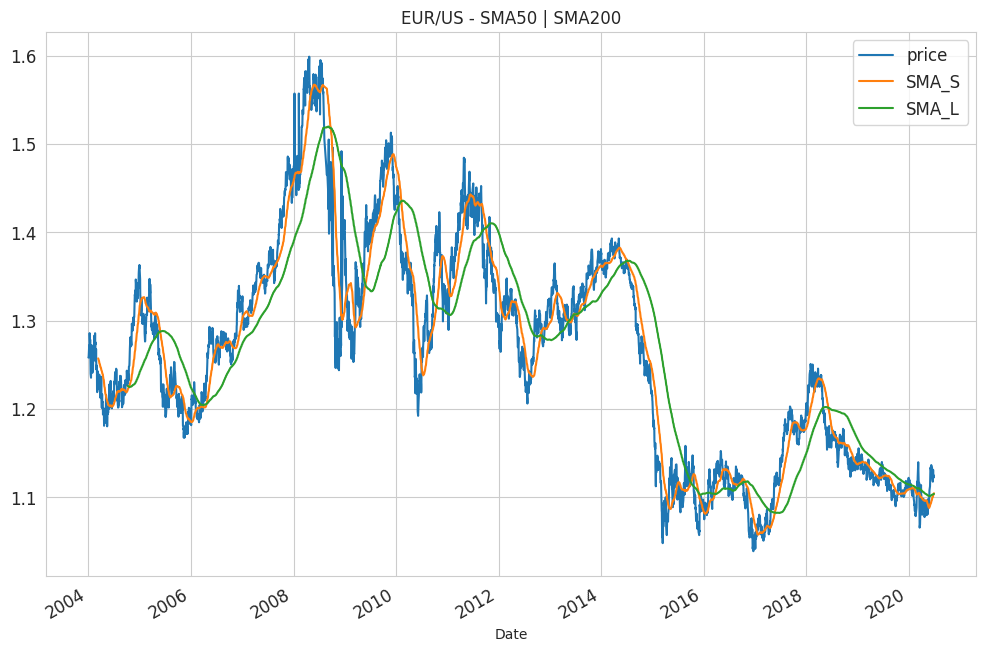

In [7]:
data.plot(figsize=(12,8), title=f'EUR/US - SMA{sma_s} | SMA{sma_l}', fontsize=12)
plt.legend(fontsize=12)
plt.show()

In [8]:
data.dropna(inplace=True)

In [9]:
data 

,price,SMA_S,SMA_L
Date,,,
2004-10-06,1.228094,1.221318,1.226222
2004-10-07,1.229906,1.221840,1.226081
2004-10-08,1.241003,1.222628,1.225995
2004-10-11,1.238405,1.223352,1.225843
2004-10-12,1.232104,1.223888,1.225643
...,...,...,...
2020-06-24,1.131235,1.101794,1.103430
2020-06-25,1.125087,1.102486,1.103540
2020-06-26,1.122208,1.103213,1.103627


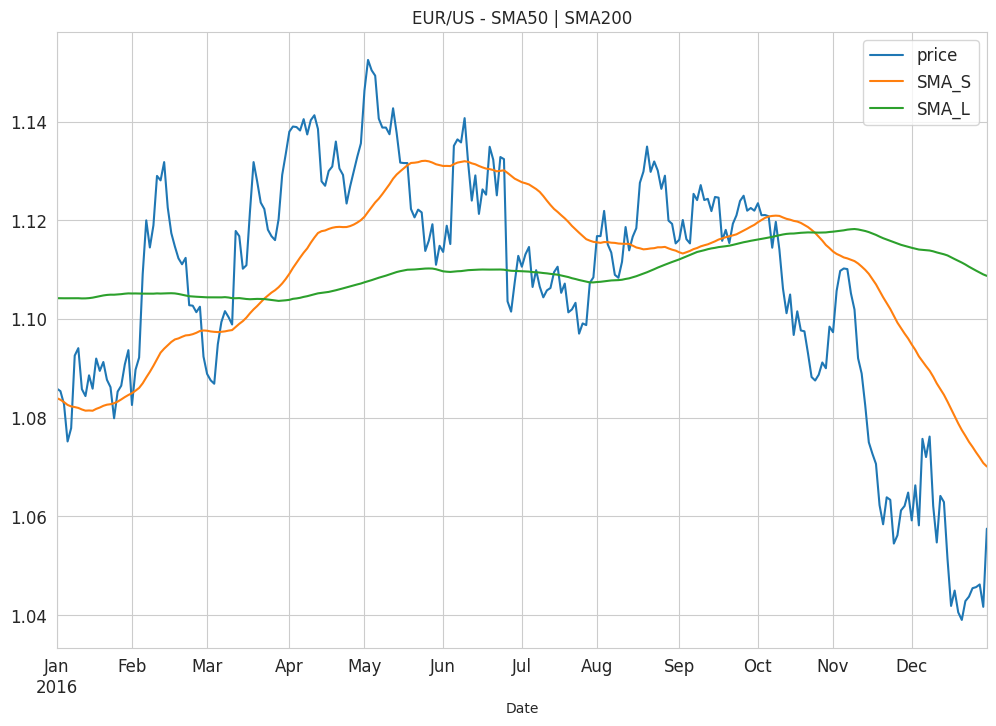

In [10]:
data.loc["2016"].plot(figsize=(12,8), title=f'EUR/US - SMA{sma_s} | SMA{sma_l}', fontsize=12)
plt.legend(fontsize=12)
plt.show()

In [11]:
data['position'] = np.where(data['SMA_S'] > data['SMA_L'], 1, -1)

In [12]:
data

,price,SMA_S,SMA_L,position
Date,,,,
2004-10-06,1.228094,1.221318,1.226222,-1
2004-10-07,1.229906,1.221840,1.226081,-1
2004-10-08,1.241003,1.222628,1.225995,-1
2004-10-11,1.238405,1.223352,1.225843,-1
2004-10-12,1.232104,1.223888,1.225643,-1
...,...,...,...,...
2020-06-24,1.131235,1.101794,1.103430,-1
2020-06-25,1.125087,1.102486,1.103540,-1
2020-06-26,1.122208,1.103213,1.103627,-1


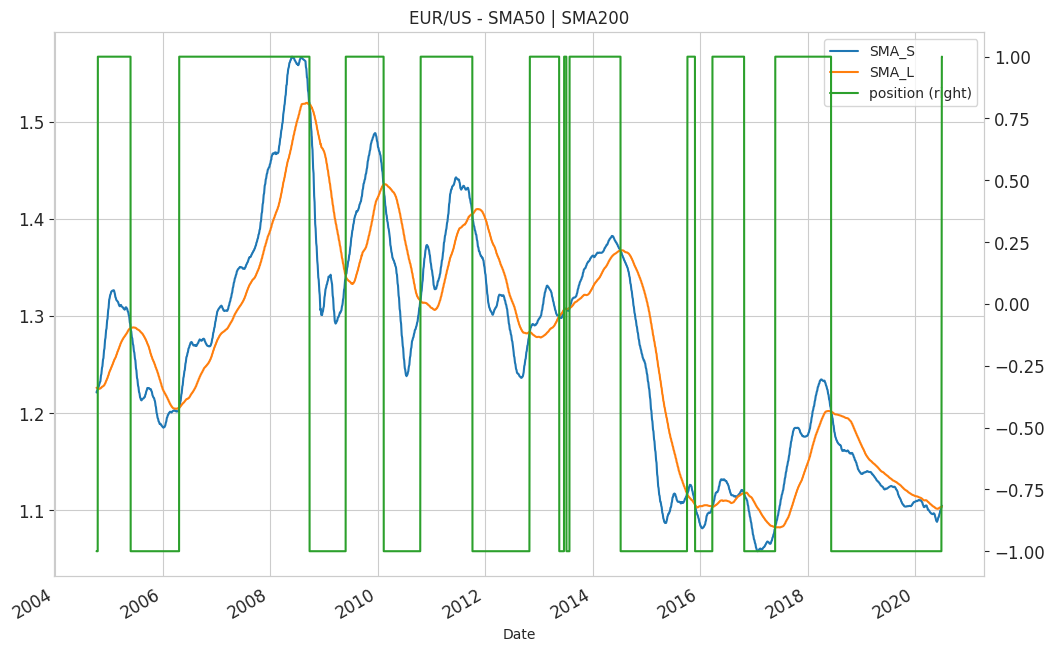

In [13]:
data.loc[:, ['SMA_S', 'SMA_L', 'position']].plot(figsize=(12,8), secondary_y='position', title=f'EUR/US - SMA{sma_s} | SMA{sma_l}', fontsize=12)
plt.show()

## Vectorized Strategy Backtesting

In [14]:
data

,price,SMA_S,SMA_L,position
Date,,,,
2004-10-06,1.228094,1.221318,1.226222,-1
2004-10-07,1.229906,1.221840,1.226081,-1
2004-10-08,1.241003,1.222628,1.225995,-1
2004-10-11,1.238405,1.223352,1.225843,-1
2004-10-12,1.232104,1.223888,1.225643,-1
...,...,...,...,...
2020-06-24,1.131235,1.101794,1.103430,-1
2020-06-25,1.125087,1.102486,1.103540,-1
2020-06-26,1.122208,1.103213,1.103627,-1


In [15]:
data['returns'] = np.log(data.price.div(data.price.shift(1)))

In [16]:
data['strategy'] = data.position.shift(1) * data['returns']

In [17]:
data

,price,SMA_S,SMA_L,position,returns,strategy
Date,,,,,,
2004-10-06,1.228094,1.221318,1.226222,-1,NaN,NaN
2004-10-07,1.229906,1.221840,1.226081,-1,0.001475,-0.001475
2004-10-08,1.241003,1.222628,1.225995,-1,0.008982,-0.008982
2004-10-11,1.238405,1.223352,1.225843,-1,-0.002095,0.002095
2004-10-12,1.232104,1.223888,1.225643,-1,-0.005102,0.005102
...,...,...,...,...,...,...
2020-06-24,1.131235,1.101794,1.103430,-1,0.002892,-0.002892
2020-06-25,1.125087,1.102486,1.103540,-1,-0.005449,0.005449
2020-06-26,1.122208,1.103213,1.103627,-1,-0.002562,0.002562


In [18]:
data.dropna(inplace=True)

In [19]:
data[['returns', 'strategy']].sum() # absolute performance

returns    -0.087929
strategy    0.249591
dtype: float64

In [20]:
data[['returns', 'strategy']].sum().apply(np.exp) # absolute performance

returns     0.915826
strategy    1.283500
dtype: float64

In [21]:
data[['returns', 'strategy']].mean() * 252 # annualized performance

returns    -0.005438
strategy    0.015435
dtype: float64

In [22]:
data[['returns', 'strategy']].std() * np.sqrt(252) # annualized risk

returns     0.120806
strategy    0.120802
dtype: float64

In [23]:
data["creturns"] = data["returns"].cumsum().apply(np.exp)
data["cstrategy"] = data["strategy"].cumsum().apply(np.exp)

In [24]:
data

,price,SMA_S,SMA_L,position,returns,strategy,creturns,cstrategy
Date,,,,,,,,
2004-10-07,1.229906,1.221840,1.226081,-1,0.001475,-0.001475,1.001476,0.998526
2004-10-08,1.241003,1.222628,1.225995,-1,0.008982,-0.008982,1.010511,0.989598
2004-10-11,1.238405,1.223352,1.225843,-1,-0.002095,0.002095,1.008396,0.991673
2004-10-12,1.232104,1.223888,1.225643,-1,-0.005102,0.005102,1.003265,0.996746
2004-10-13,1.234903,1.224466,1.225497,-1,0.002270,-0.002270,1.005545,0.994486
...,...,...,...,...,...,...,...,...
2020-06-24,1.131235,1.101794,1.103430,-1,0.002892,-0.002892,0.921130,1.271272
2020-06-25,1.125087,1.102486,1.103540,-1,-0.005449,0.005449,0.916125,1.278218
2020-06-26,1.122208,1.103213,1.103627,-1,-0.002562,0.002562,0.913781,1.281497


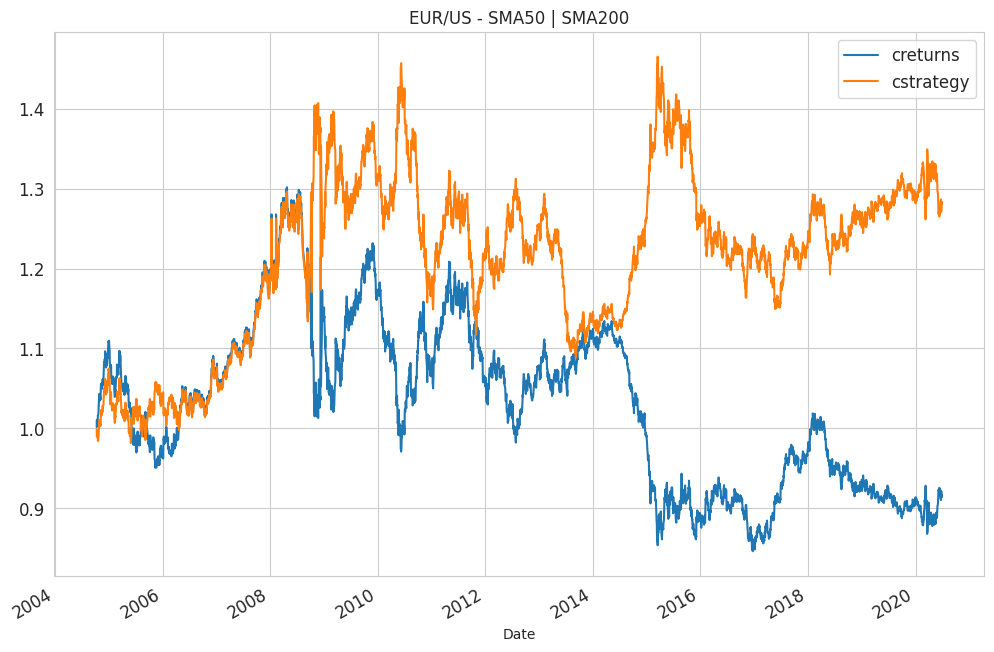

In [25]:
data[['creturns', 'cstrategy']].plot(figsize=(12,8), title=f'EUR/US - SMA{sma_s} | SMA{sma_l}', fontsize=12)
plt.legend(fontsize=12)
plt.show()

In [26]:
outperf = data.cstrategy.iloc[-1] - data.creturns.iloc[-1]
outperf

0.36767439254512924

### Finding the optimal SMA Strategy

In [27]:
df = pd.read_csv('eurusd.csv', parse_dates=['Date'], index_col='Date')
df

,price
Date,
2004-01-01,1.258194
2004-01-02,1.258194
2004-01-05,1.268698
2004-01-06,1.272103
2004-01-07,1.264095
...,...
2020-06-24,1.131235
2020-06-25,1.125087
2020-06-26,1.122208


In [28]:
def test_strategy(SMA):
    data = df.copy()
    data['returns'] = np.log(data.price.div(data.price.shift(1)))
    data['SMA_S'] = data.price.rolling(SMA[0]).mean()
    data['SMA_L'] = data.price.rolling(SMA[1]).mean()
    data.dropna(inplace=True)
    
    data['position'] = np.where(data['SMA_S'] > data['SMA_L'], 1, -1)
    data['strategy'] = data.position.shift(1) * data['returns']
    data.dropna(inplace=True)
    
    return np.exp(data["strategy"].sum())

In [29]:
test_strategy((50, 200))

1.2835003323288487

In [30]:
test_strategy((75, 150))

1.58974017632631

In [31]:
test_strategy((25, 252))

1.1755957408242586

In [33]:
SMA_S_range = range(10, 50, 1)
SMA_L_range = range(100, 252, 1)

In [34]:
SMA_S_range

range(10, 50)

In [35]:
from itertools import product

In [36]:
list(product(SMA_S_range, SMA_L_range))

[(10, 100),
 (10, 101),
 (10, 102),
 (10, 103),
 (10, 104),
 (10, 105),
 (10, 106),
 (10, 107),
 (10, 108),
 (10, 109),
 (10, 110),
 (10, 111),
 (10, 112),
 (10, 113),
 (10, 114),
 (10, 115),
 (10, 116),
 (10, 117),
 (10, 118),
 (10, 119),
 (10, 120),
 (10, 121),
 (10, 122),
 (10, 123),
 (10, 124),
 (10, 125),
 (10, 126),
 (10, 127),
 (10, 128),
 (10, 129),
 (10, 130),
 (10, 131),
 (10, 132),
 (10, 133),
 (10, 134),
 (10, 135),
 (10, 136),
 (10, 137),
 (10, 138),
 (10, 139),
 (10, 140),
 (10, 141),
 (10, 142),
 (10, 143),
 (10, 144),
 (10, 145),
 (10, 146),
 (10, 147),
 (10, 148),
 (10, 149),
 (10, 150),
 (10, 151),
 (10, 152),
 (10, 153),
 (10, 154),
 (10, 155),
 (10, 156),
 (10, 157),
 (10, 158),
 (10, 159),
 (10, 160),
 (10, 161),
 (10, 162),
 (10, 163),
 (10, 164),
 (10, 165),
 (10, 166),
 (10, 167),
 (10, 168),
 (10, 169),
 (10, 170),
 (10, 171),
 (10, 172),
 (10, 173),
 (10, 174),
 (10, 175),
 (10, 176),
 (10, 177),
 (10, 178),
 (10, 179),
 (10, 180),
 (10, 181),
 (10, 182),
 (10

In [37]:
combinations = list(product(SMA_S_range, SMA_L_range))

In [38]:
len(combinations)

6080

In [39]:
(50-10) * (252-100)

6080

In [40]:
results = []
for comb in combinations:
    results.append(test_strategy(comb))

In [41]:
results

[0.919639848594834,
 0.9017909001165385,
 0.9088514707606253,
 0.9172039081156574,
 0.9902316124249488,
 0.9839526868794094,
 1.0304555530676556,
 1.0580627844394732,
 1.0209474697557397,
 1.122541459477616,
 1.1439396770251977,
 1.0928826062479924,
 1.158686928858328,
 1.1472509415077026,
 1.0535678507360313,
 1.0834788006764182,
 1.1516639358547267,
 1.1505573494996577,
 1.1653183679562216,
 1.2167014670211942,
 1.2416587315963905,
 1.1667630873747963,
 1.2185865782849306,
 1.1718965787619908,
 1.1816366630339725,
 1.1372135785815602,
 1.1858141820530623,
 1.2667960250096422,
 1.2954797436418617,
 1.2487089215312812,
 1.2774725832850917,
 1.2815688488537096,
 1.3156013860009572,
 1.326819306602145,
 1.3746941118458667,
 1.3435175722121495,
 1.3830387805936781,
 1.3973468547986456,
 1.393392392633835,
 1.3202781031636979,
 1.3108447683042326,
 1.3519662172615807,
 1.2755744454123739,
 1.2512368246963703,
 1.1986108264031603,
 1.1860503041698052,
 1.2053044885749076,
 1.241367223998528

In [42]:
np.max(results)

2.526693989781079

In [43]:
np.argmax(results)

5509

In [44]:
combinations[np.argmax(results)]

(46, 137)

In [45]:
many_results = pd.DataFrame(data = combinations, columns=['SMA_S', 'SMA_L'])
many_results

,SMA_S,SMA_L
0,10,100
1,10,101
2,10,102
3,10,103
4,10,104
...,...,...
6075,49,247
6076,49,248
6077,49,249
6078,49,250


In [46]:
many_results['performance'] = results

In [47]:
many_results

,SMA_S,SMA_L,performance
0,10,100,0.919640
1,10,101,0.901791
2,10,102,0.908851
3,10,103,0.917204
4,10,104,0.990232
...,...,...,...
6075,49,247,1.282403
6076,49,248,1.303129
6077,49,249,1.267525
6078,49,250,1.275176


In [48]:
many_results.nlargest(10, columns='performance')

,SMA_S,SMA_L,performance
5509,46,137,2.526694
5660,47,136,2.513588
5356,45,136,2.490511
5507,46,135,2.464982
4283,38,127,2.455225
5963,49,135,2.447218
5661,47,137,2.439993
5811,48,135,2.439185
5508,46,136,2.432296
4284,38,128,2.427431


In [49]:
many_results.nsmallest(10, columns='performance')

,SMA_S,SMA_L,performance
461,13,105,0.835621
310,12,106,0.837311
309,12,105,0.846303
159,11,107,0.849825
307,12,103,0.851647
308,12,104,0.852194
608,14,100,0.865872
306,12,102,0.871889
462,13,106,0.876600
458,13,102,0.876784
